In [5]:
import pandas as pd

df_invoice = pd.read_csv('fct_invoice.csv')

In [6]:
df_invoice.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
df_customers = pd.read_json('dim_customer.json')

In [8]:
df_customers.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [9]:
unique_customers = df_customers['id'].nunique()

easy_1 = "Unique customers: " + str(unique_customers)

print(easy_1)

Unique customers: 5191


In [10]:
categories = df_invoice['category'].unique()

easy_2a = "Product categories: " + str(categories)
easy_2b = "Number of categories: " + str(len(categories))

print(easy_2a)
print(easy_2b)

Product categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of categories: 8


In [11]:
payments = df_invoice['payment_method'].value_counts()
popular_count = payments.max()
popular_method = payments.idxmax()

easy_3 = "Most popular payment method: " + str(popular_method) + " used " + str(popular_count) + " times"
print(easy_3)

Most popular payment method: Cash used 44447 times


In [42]:
df_invoice['total_sales'] = df_invoice['quantity'] * df_invoice['price']
category_sales = df_invoice.groupby('category')['total_sales'].sum()

top_3 = category_sales.sort_values(ascending=False).head(3)

top_3_categories = ", ".join([f"{cat} (${sales:,.2f})" for cat, sales in top_3.items()])

medium_1 = "Top 3 categories by total sales: " + str(top_3_categories)
print(medium_1)

Top 3 categories by total sales: Clothing ($113,996,791.04), Shoes ($66,553,451.47), Technology ($57,862,350.00)


In [23]:
df_combined = pd.merge(df_invoice, df_customers[['id','age']], left_on = 'customer_id', right_on ='id')
sales_age_45 = (df_combined[df_combined['age']>45]['quantity'] * 
                df_combined[df_combined['age']>45]['price']).sum()
medium_2 = "Total sales for customers over the age of 45: " + str(sales_age_45)

print(medium_2)

Total sales for customers over the age of 45: 82039768.15


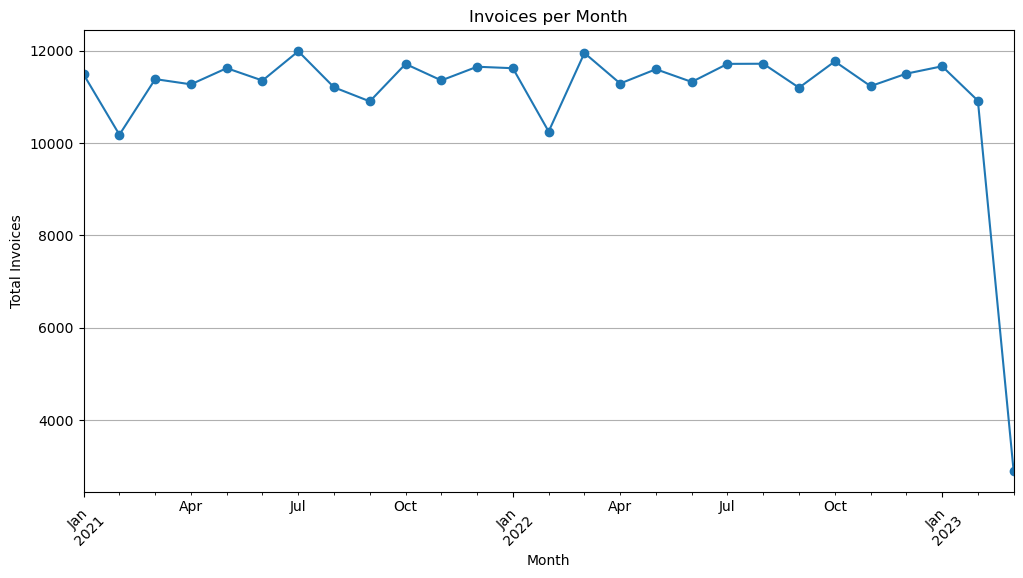

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'],dayfirst = True)

sales_per_month = df_invoice.groupby(pd.Grouper(key='invoice_date', freq='ME'))['quantity'].sum()

sales_per_month.plot(kind='line', figsize=(12,6), title='Invoices per Month', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Total Invoices')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [47]:
df_combined['sales'] = df_combined['quantity'] * df_combined['price']
df_combined['age_decade'] = (df_combined['age'] // 10) * 10
df_combined['age_range'] = df_combined['age_decade'].astype(str) +'-' + (df_combined['age_decade'] + 9).astype(str)

pivot_table = pd.pivot_table(
    df_combined,
    values = 'sales',
    index = 'category',
    columns = 'age_range',
    aggfunc = 'sum',
    fill_value = 0,
    margins = True,
    margins_name = 'Total'
)

pivot_table.style.format("{:,.2f}")

age_range,10.0-19.0,20.0-29.0,30.0-39.0,40.0-49.0,50.0-59.0,60.0-69.0,70.0-79.0,80.0-89.0,nan-nan,Total
category,,,,,,,,,,
Books,"12,801.75","79,461.75","84,143.10","87,203.40","74,962.20","80,476.80","54,827.85","26,664.00","334,012.05","834,552.90"
Clothing,"1,927,413.84","10,250,732.80","11,354,126.96","11,215,189.92","10,321,851.76","10,660,642.08","7,769,371.28","4,493,698.00","46,003,764.40","113,996,791.04"
Cosmetics,"109,619.36","605,915.32","723,544.70","665,034.96","587,780.96","649,990.76","419,082.62","254,531.60","2,777,362.62","6,792,862.90"
Food & Beverage,"13,582.31","73,491.96","87,246.86","89,553.29","72,425.04","80,976.09","55,050.98","31,332.93","345,875.59","849,535.05"
Shoes,"993,281.35","5,924,878.24","7,200,839.66","7,025,590.02","5,852,857.84","5,978,893.54","4,480,269.05","2,628,744.60","26,468,097.17","66,553,451.47"
Souvenir,"12,375.15","54,943.32","64,092.72","66,391.80","54,943.32","55,025.43","38,673.81","23,718.06","265,661.04","635,824.65"
Technology,"1,129,800.00","5,261,550.00","6,159,300.00","5,954,550.00","4,435,200.00","5,471,550.00","3,638,250.00","1,946,700.00","23,865,450.00","57,862,350.00"
Toys,"60,426.24","385,100.80","420,582.40","390,906.88","345,067.52","363,955.20","273,244.16","153,932.80","1,587,210.24","3,980,426.24"
Total,"4,259,300.00","22,636,074.19","26,093,876.40","25,494,420.27","21,745,088.64","23,341,509.90","16,728,769.75","9,559,321.99","101,647,433.11","251,505,794.25"
